# Data Loading And Exploration

*The dataset selected to replicate the paper is H3K4me1. We performed an exploratory analysis and found that the statistics summary of the base length to be a bit off, meaning that the base lenghts of all the DNA samples are not equal. We then processed to check the outliers and removed them.*

                 id                                           sequence class
0    >iYAL068C_2263  CATGTAGTATTGGGCTAAGTGAGCTCTGATATCAGAGACGTAGACA...     0
1  >iYAL067W-A_2858  CTGAATTCAGTCTGCTTTAAACGGCTTCCGCGGAGGAAATATTTCC...     0
2  >iYAL067W-A_3010  TAGCCGCTGAGAAGCGGATGGTAATGAGACAAGTTGATATCAAACA...     0
3  >iYAL067W-A_3525  AGGGAAACAGTAAACAGTGAAAATTCTCTTGAGAACCAAAGTAAAC...     0
4  >iYAL067W-A_3619  GGTTTCCATACCTCCCCAGCATCATACATCTTTTTTCAAAGAAACT...     0
Index(['id', 'sequence', 'class'], dtype='object')
id          0
sequence    0
class       0
dtype: int64
class
1    17266
0    14409
Name: count, dtype: int64
count    31675.0
mean       500.0
std          0.0
min        500.0
25%        500.0
50%        500.0
75%        500.0
max        500.0
Name: sequence_length, dtype: float64


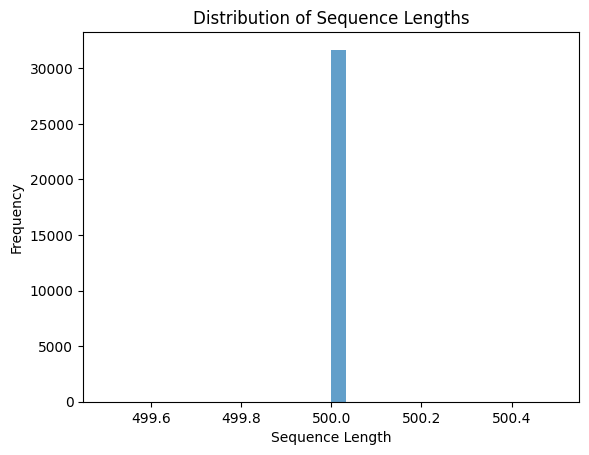

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"/Users/mridulmishra/Desktop/SUMMER TERM/dataset.txt"

# Initialize lists to store the data
ids = []
sequences = []
classes = []

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

    # Process lines in chunks of 3
    for i in range(0, len(lines), 3):
        ids.append(lines[i].strip())
        sequences.append(lines[i+1].strip())
        classes.append(lines[i+2].strip())

# Construct the DataFrame
data = {'id': ids, 'sequence': sequences, 'class': classes}
df = pd.DataFrame(data)

# Display the first few rows to verify the DataFrame
print(df.head())
print(df.columns)

# Perform Exploratory Data Analysis (EDA)

# Check for missing values
print(df.isnull().sum())

# Count the number of unique classes
print(df['class'].value_counts())

# Calculate sequence lengths
df['sequence_length'] = df['sequence'].apply(len)

# Summary statistics for sequence lengths
print(df['sequence_length'].describe())

# Plot the distribution of sequence lengths
plt.hist(df['sequence_length'], bins=30, alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


Number of sequences with length not equal to 500: 0
Empty DataFrame
Columns: [id, sequence_length, class]
Index: []


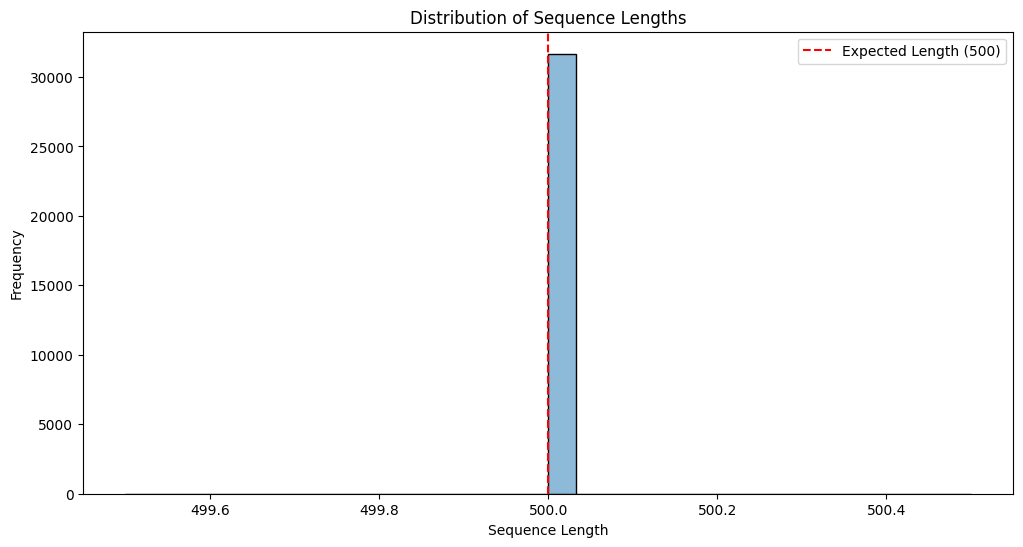

Sequences with length not equal to 500:
Empty DataFrame
Columns: [id, sequence, sequence_length, class]
Index: []
Number of sequences with length equal to 500: 31675
                 id                                           sequence class  \
0    >iYAL068C_2263  CATGTAGTATTGGGCTAAGTGAGCTCTGATATCAGAGACGTAGACA...     0   
1  >iYAL067W-A_2858  CTGAATTCAGTCTGCTTTAAACGGCTTCCGCGGAGGAAATATTTCC...     0   
2  >iYAL067W-A_3010  TAGCCGCTGAGAAGCGGATGGTAATGAGACAAGTTGATATCAAACA...     0   
3  >iYAL067W-A_3525  AGGGAAACAGTAAACAGTGAAAATTCTCTTGAGAACCAAAGTAAAC...     0   
4  >iYAL067W-A_3619  GGTTTCCATACCTCCCCAGCATCATACATCTTTTTTCAAAGAAACT...     0   

   sequence_length  
0              500  
1              500  
2              500  
3              500  
4              500  
Number of sequences with length equal to 500: 31675
                 id                                           sequence class  \
0    >iYAL068C_2263  CATGTAGTATTGGGCTAAGTGAGCTCTGATATCAGAGACGTAGACA...     0   
1  >iYAL067W-A_

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the txt file
data = open(r"/Users/mridulmishra/Desktop/SUMMER TERM/dataset.txt", 'r').read().splitlines()

# Process the data
ids = data[0::3]
sequences = data[1::3]
classes = data[2::3]

# Create a DataFrame
df = pd.DataFrame({'id': ids, 'sequence': sequences, 'class': classes})

# Create a new column for sequence lengths
df['sequence_length'] = df['sequence'].apply(len)

# Identify sequences with lengths not equal to 500
outliers = df[df['sequence_length'] != 500]

# Display the outliers
print(f'Number of sequences with length not equal to 500: {len(outliers)}')
print(outliers[['id', 'sequence_length', 'class']])

# Plot the sequence lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['sequence_length'], kde=True, bins=30)
plt.axvline(x=500, color='red', linestyle='--', label='Expected Length (500)')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Highlight outliers
print(f'Sequences with length not equal to 500:')
print(outliers[['id', 'sequence', 'sequence_length', 'class']])

df_filtered = df[df['sequence_length'] == 500]

# Display the filtered DataFrame
print(f'Number of sequences with length equal to 500: {len(df_filtered)}')
print(df_filtered.head())

df_filtered = df[df['sequence_length'] == 500]

# Display the filtered DataFrame
print(f'Number of sequences with length equal to 500: {len(df_filtered)}')
print(df_filtered.head())

# Save the filtered DataFrame to a CSV file
df_filtered.to_csv(r'C:\\Users\shire\OneDrive\Desktop\Project\dataset.csv', index=False)

print('Filtered sequences have been saved')

# Save the filtered DataFrame to a text file
with open(r'C:\\Users\shire\OneDrive\Desktop\Project\dataset.txt', 'w') as f:
    for idx, row in df_filtered.iterrows():
        f.write(f"{row['id']}\n")
        f.write(f"{row['sequence']}\n")
        f.write(f"{row['class']}\n")

print('Filtered sequences have been saved')




                 id                                           sequence class
0    >iYAL068C_2263  CATGTAGTATTGGGCTAAGTGAGCTCTGATATCAGAGACGTAGACA...     0
1  >iYAL067W-A_2858  CTGAATTCAGTCTGCTTTAAACGGCTTCCGCGGAGGAAATATTTCC...     0
2  >iYAL067W-A_3010  TAGCCGCTGAGAAGCGGATGGTAATGAGACAAGTTGATATCAAACA...     0
3  >iYAL067W-A_3525  AGGGAAACAGTAAACAGTGAAAATTCTCTTGAGAACCAAAGTAAAC...     0
4  >iYAL067W-A_3619  GGTTTCCATACCTCCCCAGCATCATACATCTTTTTTCAAAGAAACT...     0
Index(['id', 'sequence', 'class'], dtype='object')
id          0
sequence    0
class       0
dtype: int64
class
1    17266
0    14409
Name: count, dtype: int64
count    31675.0
mean       500.0
std          0.0
min        500.0
25%        500.0
50%        500.0
75%        500.0
max        500.0
Name: sequence_length, dtype: float64


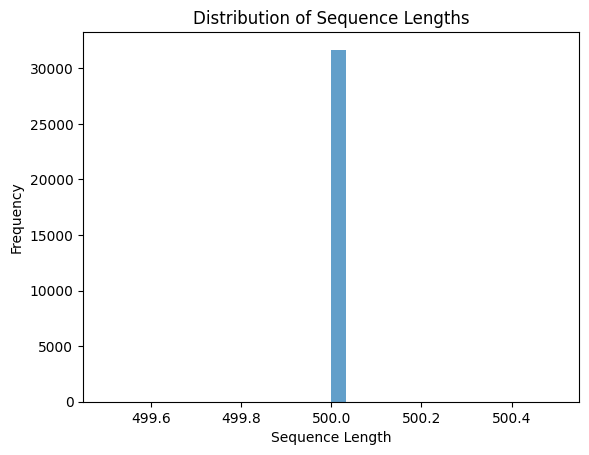

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'/Users/mridulmishra/Desktop/SUMMER TERM/dataset.txt'

# Initialize lists to store the data
ids = []
sequences = []
classes = []

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

    # Process lines in chunks of 3
    for i in range(0, len(lines), 3):
        ids.append(lines[i].strip())
        sequences.append(lines[i+1].strip())
        classes.append(lines[i+2].strip())

# Construct the DataFrame
data = {'id': ids, 'sequence': sequences, 'class': classes}
df = pd.DataFrame(data)

# Display the first few rows to verify the DataFrame
print(df.head())
print(df.columns)

# Perform Exploratory Data Analysis (EDA)

# Check for missing values
print(df.isnull().sum())

# Count the number of unique classes
print(df['class'].value_counts())

# Calculate sequence lengths
df['sequence_length'] = df['sequence'].apply(len)

# Summary statistics for sequence lengths
print(df['sequence_length'].describe())

# Plot the distribution of sequence lengths
plt.hist(df['sequence_length'], bins=30, alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Sequence Representation and Embedding techniques

*starting with 3 mer representation*

In [20]:
import keras
keras.__version__

'3.4.1'

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the filtered dataset
with open(r'/Users/mridulmishra/Desktop/SUMMER TERM/dataset.txt', 'r') as file:
    lines = file.read().splitlines()

ids = lines[0::3]
sequences = lines[1::3]
classes = lines[2::3]

# 3-mer representation
def k_mer(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

k_mer_sequences = [k_mer(seq) for seq in sequences]

print('done')


done


*One-hot code representation and visualisation*

In [4]:
# Embedding: SequenceEmbedding1D (One-Hot Encoding)
def one_hot_encode(k_mer_sequence):
    vocab_size = 64  # 4^3 possible 3-mers
    one_hot_encoded = []
    for mer in k_mer_sequence:
        index = one_hot(mer, vocab_size)
        one_hot_encoded.append(index[0])
    return one_hot_encoded

one_hot_encoded_sequences = [one_hot_encode(seq) for seq in k_mer_sequences]

# Flatten one-hot encoded sequences for visualization
flattened_one_hot_encoded = [np.array(seq).flatten() for seq in one_hot_encoded_sequences]

# Convert classes to numeric labels for visualization
label_map = {label: idx for idx, label in enumerate(set(classes))}
numeric_labels = [label_map[label] for label in classes]

print("done")


done


# Implenting The CNN architecture 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 494, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 494, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 247, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 247, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 243, 256)       │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 243, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 121, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 121, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,010 (1.14 MB)

 Trainable params: 298,242 (1.14 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/200
272/272 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step - accuracy: 0.5270 - loss: 0.8796 - val_accuracy: 0.4516 - val_loss: 0.9028
Epoch 2/200
272/272 ━━━━━━━━━━━━━━━━━━━━ 39s 143ms/step - accuracy: 0.5596 - loss: 0.8341 - val_accuracy: 0.5918 - val_loss: 0.8120
Epoch 3/200
272/272 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step - accuracy: 0.5957 - loss: 0.8039 - val_accuracy: 0.5976 - val_loss: 0.8019
Epoch 4/200
272/272 ━━━━━━━━━━━━━━━━━━━━ 37s 137ms/step - accuracy: 0.5948 - loss: 0.7920 - val_accuracy: 0.6087 - val_loss: 0.7856
Epoch 5/200
272/272 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - accuracy: 0.5971 - loss: 0.7816 - val_accuracy: 0.5989 - val_loss: 0.7710
Epoch 6/200
272/272 ━━━━━━━━━━━━━━━━━━━━ 38s 141ms/step - accuracy: 0.6004 - loss: 0.7699 - val_accuracy: 0.6120 - val_loss: 0.7587
Epoch 7/200
272/272 ━━━━━━━━━━━━━━━━━━━━ 39s 144ms/step - accuracy: 0.6093 - loss: 0.7569 - val_accuracy: 0.6115 - val_loss: 0.7494
Epoch 8/200
272/272 ━━━━━━━━━━━━━━━━━━━━ 38s 140ms/step - accuracy: 0.6002 -

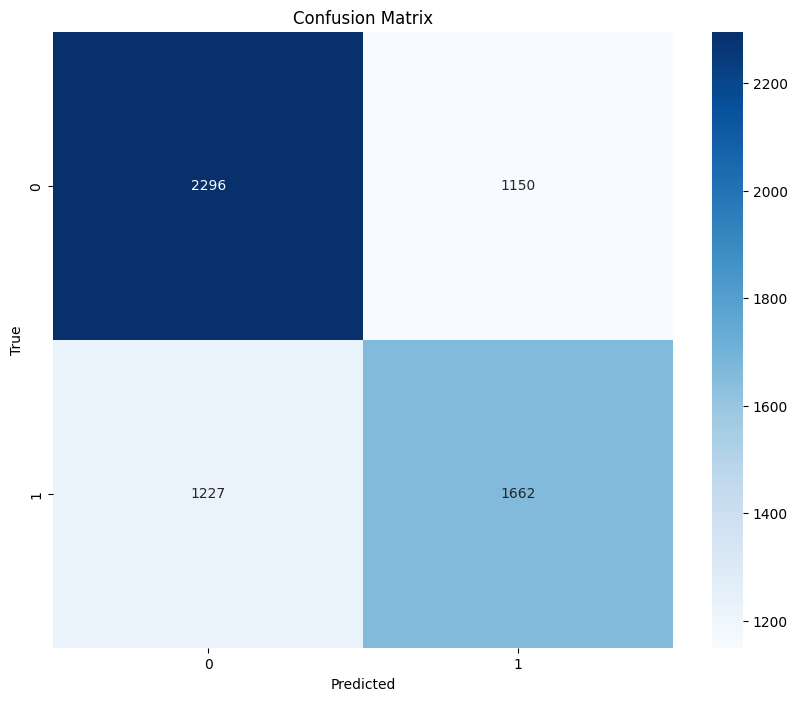

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      3446
           1       0.59      0.58      0.58      2889

    accuracy                           0.62      6335
   macro avg       0.62      0.62      0.62      6335
weighted avg       0.62      0.62      0.62      6335



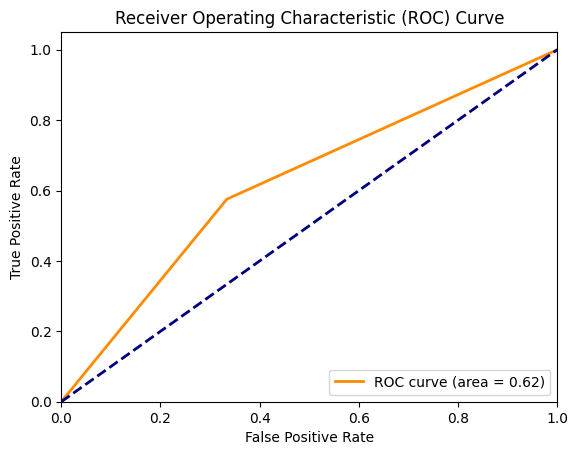

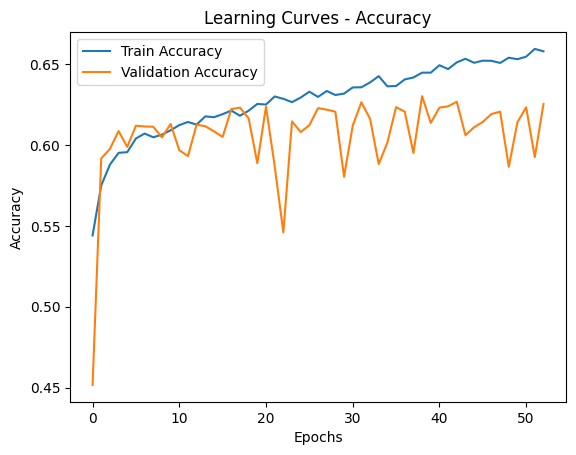

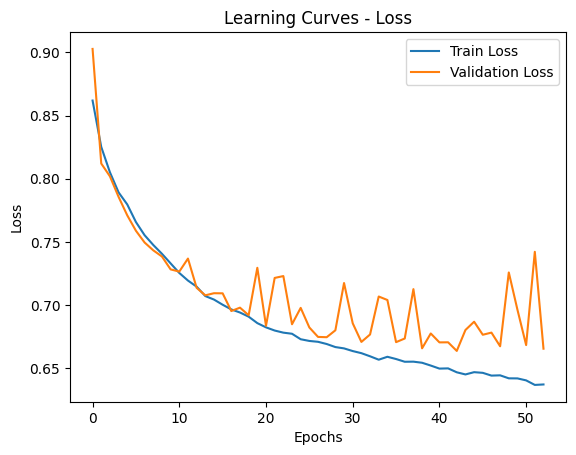

In [5]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input, MaxPooling1D, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Prepare the data
# Assuming one_hot_encoded_sequences and classes are ready from the previous steps
one_hot_encoded_sequences = np.array(flattened_one_hot_encoded)
numeric_labels = np.array(numeric_labels)

# Split the data into training, validation, and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(one_hot_encoded_sequences, numeric_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Ensure the data is in the correct shape for Conv1D (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

# Define the model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(GlobalAveragePooling1D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Implement early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=70, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

# Load the best model
model.load_weights('best_model.keras')

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Accuracy: {train_accuracy}')

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_true, y_pred)
print('Classification Report:')
print(class_report)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plotting Learning Curves
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves - Loss')
plt.legend()
plt.show()
